Assignment 1 

Ferdinantos Kottas

The assignment required to balance an imbalance dataset using three methodologies: an oversampling techniqued, an undersampling technique, and an ensemble methodology. The impact of the balancing on model performance will be investigated using an RF, an SVM, and a Naive Bayes model.

# Importing of Libraries

Importing of all the necessary libraries

In [1]:
#import the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy as sp
from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn import ensemble
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC
import time

In [2]:
cd C:\Users\Meetings\OneDrive - Αριστοτέλειο Πανεπιστήμιο Θεσσαλονίκης\Ερευνητικά\MsC\Προχωρημένα Θέματα Μηχανικής

C:\Users\Meetings\OneDrive - Αριστοτέλειο Πανεπιστήμιο Θεσσαλονίκης\Ερευνητικά\MsC\Προχωρημένα Θέματα Μηχανικής


# Data Import

Our dataset is loaded as a dataframe

In [3]:
dataset= pd.read_csv("carclaims.csv")
dataset.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange-Claim,NumberOfCars,Year,BasePolicy,FraudFound
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability,No
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision,No
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision,No
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability,No
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision,No


# Endcoding and Dimensionality Reduction

First we perform the encoding of the catecorigal variables using dummies variables (0/1). Then through a feature selection methodology for categorigal variables based on the chi-squared statistic we perform a dimensionality reduction, keeping only the 8 most relevant with the outcome variables. 8 was chosen randomly and it aims to decrease the computational power required. 

In [4]:
#encoding of catecorigal variables
encoding = pd.get_dummies(dataset, drop_first=True)

In [5]:
#defining X and y
X=encoding.drop("FraudFound_Yes", axis=1)
y=encoding["FraudFound_Yes"]

In [6]:
#defining the select_features which will be called to calculate the fs scores of each feature
def select_features(X_train, y_train, X_test):
 fs = SelectKBest(score_func=chi2, k="all")
 fs.fit(X_train, y_train)
 X_train_fs = fs.transform(X_train)
 X_test_fs = fs.transform(X_test)
 return X_train_fs, X_test_fs, fs

In [7]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [9]:
#calling the select_features
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)

Feature 0: 0.921023
Feature 1: 0.234254
Feature 2: 31.215543
Feature 3: 9734.989625
Feature 4: 0.526832
Feature 5: 8.591440
Feature 6: 0.090415
Feature 7: 0.001803
Feature 8: 3.908187
Feature 9: 1.094590
Feature 10: 0.055810
Feature 11: 0.578942
Feature 12: 2.968827
Feature 13: 0.187446
Feature 14: 2.891705
Feature 15: 0.945509
Feature 16: 3.551151
Feature 17: 0.865838
Feature 18: 0.056612
Feature 19: 0.303171
Feature 20: 2.366259
Feature 21: 0.741605
Feature 22: 0.814536
Feature 23: 0.964348
Feature 24: 2.429065
Feature 25: 0.541201
Feature 26: 0.012145
Feature 27: 2.356069
Feature 28: 0.060133
Feature 29: 1.085578
Feature 30: 0.913126
Feature 31: 0.360800
Feature 32: 0.060133
Feature 33: 0.110801
Feature 34: 0.120267
Feature 35: 0.080510
Feature 36: 0.052206
Feature 37: 3.484248
Feature 38: 0.300667
Feature 39: 1.778290
Feature 40: 0.021574
Feature 41: 0.117725
Feature 42: 4.988179
Feature 43: 0.901876
Feature 44: 0.482305
Feature 45: 1.397039
Feature 46: 2.565808
Feature 47: 0.72082

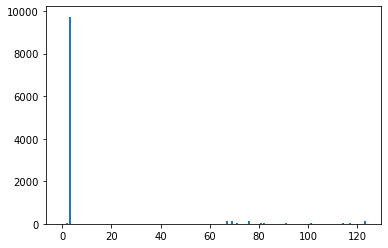

In [10]:
#printing the fs scores 
for i in range(len(fs.scores_)):
 print('Feature %d: %f' % (i, fs.scores_[i]))
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

In [11]:
#finding the 8 best fs scores
k = 8
top_k_indices = (-fs.scores_).argsort()[:k]
for i in top_k_indices:
    print('Feature %d: %f' % (i, fs.scores_[i]))

Feature 3: 9734.989625
Feature 123: 152.458992
Feature 69: 151.631679
Feature 67: 117.920072
Feature 76: 113.970611
Feature 114: 47.094044
Feature 2: 31.215543
Feature 71: 24.568818


In [12]:
colname = X.columns[top_k_indices]
print (colname)

Index(['PolicyNumber', 'BasePolicy_Liability', 'PolicyType_Sedan - Liability',
       'Fault_Third Party', 'VehicleCategory_Sport',
       'AddressChange-Claim_2 to 3 years', 'Age',
       'PolicyType_Sport - Collision'],
      dtype='object')


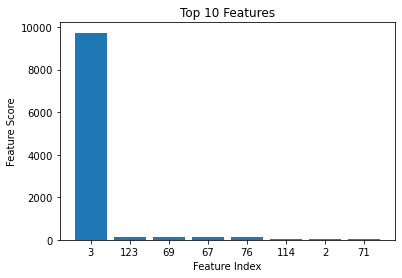

In [13]:
plt.bar(range(k), fs.scores_[top_k_indices])
plt.xticks(range(k), top_k_indices)
plt.xlabel('Feature Index')
plt.ylabel('Feature Score')
plt.title('Top 10 Features')
plt.show()

Here, we see the 8 features that were included in our model development

In [14]:
df= pd.DataFrame({"Feature Index":top_k_indices, "Feature Name":colname})
df

,Feature Index,Feature Name
0,3,PolicyNumber
1,123,BasePolicy_Liability
2,69,PolicyType_Sedan - Liability
3,67,Fault_Third Party
4,76,VehicleCategory_Sport
5,114,AddressChange-Claim_2 to 3 years
6,2,Age
7,71,PolicyType_Sport - Collision


In [15]:
#droping other features keeping the selected 8 features for X
X = X.values
X_top_k = X[:, top_k_indices]
y = y.values
y = y.ravel()

# Model Development with Imbalanced Data

Firstly, we develop an SVM, an RF and a Naive-Bayes model without balacing the clasess. We hypertune the parameters of our models using the GridSearch methodology.

C:\Users\Meetings\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='FraudFound_Yes', ylabel='count'>

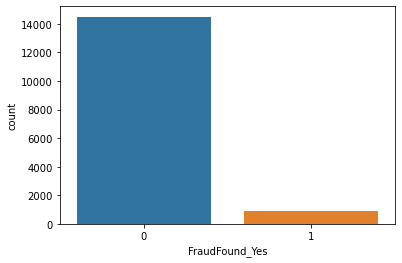

In [16]:
sns.countplot(encoding["FraudFound_Yes"])

In [17]:
# gridsearch for RF model
training = time.time()
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.25, random_state=42)
param_grid = {'criterion': ["entropy","gini"],'n_estimators': np.arange(1,11).tolist(), "max_depth": np.arange(1,11).tolist()}
grid = GridSearchCV(ensemble.RandomForestClassifier(), param_grid, refit = True, verbose = 3)
grid.fit(X_train, y_train)
print('Training time (sec): ', time.time() - training)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
[CV 1/5] END criterion=entropy, max_depth=1, n_estimators=1;, score=0.941 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=1, n_estimators=1;, score=0.941 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=1, n_estimators=1;, score=0.941 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=1, n_estimators=1;, score=0.941 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=1, n_estimators=1;, score=0.941 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=1, n_estimators=2;, score=0.941 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=1, n_estimators=2;, score=0.941 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=1, n_estimators=2;, score=0.941 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=1, n_estimators=2;, score=0.941 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=1, n_estimators=2;, score=0.941 total time=   0.0s
[CV 1/

In [18]:
print(grid.best_params_)
print(grid.best_estimator_)
grid_predictions = grid.predict(X_test)
print(classification_report(y_test, grid_predictions))

{'criterion': 'gini', 'max_depth': 9, 'n_estimators': 4}
RandomForestClassifier(max_depth=9, n_estimators=4)
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      3615
           1       0.00      0.00      0.00       240

    accuracy                           0.94      3855
   macro avg       0.47      0.50      0.48      3855
weighted avg       0.88      0.94      0.91      3855



Due to long training times we could not perform GridSearch for the SVM model. 

In [19]:
training = time.time()
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.45, random_state=42)
SVM = SVC(C=0.1, kernel = "linear")
SVM.fit(X_train, y_train)
y_predicted = SVM.predict(X_test)
y_predicted_training = SVM.predict(X_train)
print("The F1 score in the validation set is:", metrics.f1_score(y_test,y_predicted))
print("The accuracy in the validation set is:", metrics.accuracy_score(y_test,y_predicted))
print("The recall score in the validation set is:", metrics.recall_score(y_test,y_predicted))
print("The precision score in the validation set is:", metrics.precision_score(y_test,y_predicted))
print('Training time (sec): ', time.time() - training)

The F1 score in the validation set is: 0.04434589800443459
The accuracy in the validation set is: 0.9378873036460585
The recall score in the validation set is: 0.024390243902439025
The precision score in the validation set is: 0.24390243902439024
Training time (sec):  723.5940403938293


In [20]:
from sklearn.naive_bayes import GaussianNB

In [21]:
#Gridsearch for Naive Bayes
training = time.time()
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.25, random_state=42)
param_grid = {'var_smoothing': [1e-09, 1e-08, 1e-07,1e-06]}
grid = GridSearchCV(GaussianNB(), param_grid, refit = True, verbose = 3)
grid.fit(X_train, y_train)
print('Training time (sec): ', time.time() - training)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END ...............var_smoothing=1e-09;, score=0.786 total time=   0.0s
[CV 2/5] END ...............var_smoothing=1e-09;, score=0.772 total time=   0.0s
[CV 3/5] END ...............var_smoothing=1e-09;, score=0.815 total time=   0.0s
[CV 4/5] END ...............var_smoothing=1e-09;, score=0.797 total time=   0.0s
[CV 5/5] END ...............var_smoothing=1e-09;, score=0.807 total time=   0.0s
[CV 1/5] END ...............var_smoothing=1e-08;, score=0.936 total time=   0.0s
[CV 2/5] END ...............var_smoothing=1e-08;, score=0.938 total time=   0.0s
[CV 3/5] END ...............var_smoothing=1e-08;, score=0.940 total time=   0.0s
[CV 4/5] END ...............var_smoothing=1e-08;, score=0.933 total time=   0.0s
[CV 5/5] END ...............var_smoothing=1e-08;, score=0.933 total time=   0.0s
[CV 1/5] END ...............var_smoothing=1e-07;, score=0.941 total time=   0.0s
[CV 2/5] END ...............var_smoothing=1e-07;,

In [22]:
print(grid.best_params_)
print(grid.best_estimator_)
grid_predictions = grid.predict(X_test)
print(classification_report(y_test, grid_predictions))

{'var_smoothing': 1e-07}
GaussianNB(var_smoothing=1e-07)
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      3615
           1       0.00      0.00      0.00       240

    accuracy                           0.94      3855
   macro avg       0.47      0.50      0.48      3855
weighted avg       0.88      0.94      0.91      3855



C:\Users\Meetings\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Meetings\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Meetings\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


We see that the models demonstrate a high precision and recall for the 0 class which dominates the dataet and 0 precision/recall for the 1 class due to the imbalance of the dataset

# Model development with Oversampling (SMOTE)

Then, we perform the same methodology with balanced classes using three different methodologies. Firstly, we balance through oversampling using the Synthetic Minority Oversampling Technique (SMOTE)

In [23]:
from sklearn.datasets import make_classification
import imblearn.over_sampling
from imblearn.over_sampling import SMOTE

In [24]:
#oversampling
over_sampling= SMOTE(sampling_strategy='minority', random_state=42, k_neighbors=5)
X_oversampled, y_oversampled = over_sampling.fit_resample(X,y)

In [25]:
y_oversampled.shape

(28994,)

C:\Users\Meetings\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

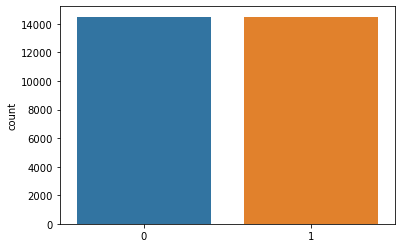

In [26]:
sns.countplot(y_oversampled)

In [27]:
#Gridsearch for RF
training = time.time()
X_train, X_test, y_train, y_test=train_test_split(X_oversampled,y_oversampled, test_size=0.25, random_state=42)
param_grid = {'criterion': ["entropy","gini"],'n_estimators': np.arange(1,11).tolist(), "max_depth": np.arange(1,11).tolist()}
grid = GridSearchCV(ensemble.RandomForestClassifier(), param_grid, refit = True, verbose = 3)
grid.fit(X_train, y_train)
print('Training time (sec): ', time.time() - training)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
[CV 1/5] END criterion=entropy, max_depth=1, n_estimators=1;, score=0.669 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=1, n_estimators=1;, score=0.568 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=1, n_estimators=1;, score=0.662 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=1, n_estimators=1;, score=0.607 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=1, n_estimators=1;, score=0.564 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=1, n_estimators=2;, score=0.681 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=1, n_estimators=2;, score=0.616 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=1, n_estimators=2;, score=0.661 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=1, n_estimators=2;, score=0.630 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=1, n_estimators=2;, score=0.564 total time=   0.0s
[CV 1/

In [28]:
print(grid.best_params_)
print(grid.best_estimator_)
grid_predictions = grid.predict(X_test)
print(classification_report(y_test, grid_predictions))

{'criterion': 'gini', 'max_depth': 10, 'n_estimators': 10}
RandomForestClassifier(max_depth=10, n_estimators=10)
              precision    recall  f1-score   support

           0       0.95      0.93      0.94      3621
           1       0.93      0.95      0.94      3628

    accuracy                           0.94      7249
   macro avg       0.94      0.94      0.94      7249
weighted avg       0.94      0.94      0.94      7249



In [29]:
training = time.time()
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.45, random_state=42)
SVM = SVC(C=1, gamma= 0.2, kernel = "linear")
SVM.fit(X_train, y_train)
y_predicted = SVM.predict(X_test)
y_predicted_training = SVM.predict(X_train)
print("The F1 score in the validation set is:", metrics.f1_score(y_test,y_predicted))
print("The accuracy in the validation set is:", metrics.accuracy_score(y_test,y_predicted))
print("The recall score in the validation set is:", metrics.recall_score(y_test,y_predicted))
print("The precision score in the validation set is:", metrics.precision_score(y_test,y_predicted))
print('Training time (sec): ', time.time() - training)

The F1 score in the validation set is: 0.05327868852459016
The accuracy in the validation set is: 0.9334198011240813
The recall score in the validation set is: 0.03170731707317073
The precision score in the validation set is: 0.16666666666666666
Training time (sec):  910.8350923061371


In [30]:
#Gridsearch for Naive Bayes
training = time.time()
X_train, X_test, y_train, y_test=train_test_split(X_oversampled,y_oversampled, test_size=0.25, random_state=42)
param_grid = {'var_smoothing': [1e-09, 1e-08, 1e-07,1e-06]}
grid = GridSearchCV(GaussianNB(), param_grid, refit = True, verbose = 3)
grid.fit(X_train, y_train)
print('Training time (sec): ', time.time() - training)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END ...............var_smoothing=1e-09;, score=0.913 total time=   0.0s
[CV 2/5] END ...............var_smoothing=1e-09;, score=0.919 total time=   0.0s
[CV 3/5] END ...............var_smoothing=1e-09;, score=0.917 total time=   0.0s
[CV 4/5] END ...............var_smoothing=1e-09;, score=0.913 total time=   0.0s
[CV 5/5] END ...............var_smoothing=1e-09;, score=0.910 total time=   0.0s
[CV 1/5] END ...............var_smoothing=1e-08;, score=0.675 total time=   0.0s
[CV 2/5] END ...............var_smoothing=1e-08;, score=0.676 total time=   0.0s
[CV 3/5] END ...............var_smoothing=1e-08;, score=0.663 total time=   0.0s
[CV 4/5] END ...............var_smoothing=1e-08;, score=0.674 total time=   0.0s
[CV 5/5] END ...............var_smoothing=1e-08;, score=0.668 total time=   0.0s
[CV 1/5] END ...............var_smoothing=1e-07;, score=0.538 total time=   0.0s
[CV 2/5] END ...............var_smoothing=1e-07;,

In [31]:
print(grid.best_params_)
print(grid.best_estimator_)
grid_predictions = grid.predict(X_test)
print(classification_report(y_test, grid_predictions))

{'var_smoothing': 1e-09}
GaussianNB()
              precision    recall  f1-score   support

           0       0.95      0.88      0.91      3621
           1       0.89      0.95      0.92      3628

    accuracy                           0.92      7249
   macro avg       0.92      0.92      0.92      7249
weighted avg       0.92      0.92      0.92      7249



The oversampling technique greatly increased the performance of the RF and Naive Bayes, while the performance of the SVM improved sligtly compared with the performance of the imbalance dataset. The RF model demonstated the best performance achieving a 93-95% precision/recall for both classes.

# Model Development with UnderSampling (NearMiss)

Then, we balance our classes using an undersampling methodology and specifically the NearMiss methodology.

In [32]:
import imblearn.under_sampling
from imblearn.under_sampling import NearMiss

In [33]:
#undersampling
under_sampling= NearMiss(sampling_strategy='majority', n_neighbors=5, n_neighbors_ver3=3)
X_undersampled, y_undersampled = under_sampling.fit_resample(X,y)

C:\Users\Meetings\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

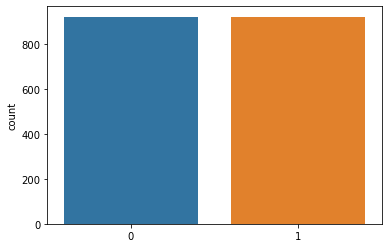

In [34]:
sns.countplot(y_undersampled)

In [35]:
#Gridsearch for RF
training = time.time()
X_train, X_test, y_train, y_test=train_test_split(X_undersampled, y_undersampled, test_size=0.25, random_state=42)
param_grid = {'criterion': ["entropy","gini"],'n_estimators': np.arange(1,11).tolist(), "max_depth": np.arange(1,11).tolist()}
grid = GridSearchCV(ensemble.RandomForestClassifier(), param_grid, refit = True, verbose = 3)
grid.fit(X_train, y_train)
print('Training time (sec): ', time.time() - training)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
[CV 1/5] END criterion=entropy, max_depth=1, n_estimators=1;, score=0.592 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=1, n_estimators=1;, score=0.563 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=1, n_estimators=1;, score=0.690 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=1, n_estimators=1;, score=0.520 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=1, n_estimators=1;, score=0.504 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=1, n_estimators=2;, score=0.592 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=1, n_estimators=2;, score=0.628 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=1, n_estimators=2;, score=0.527 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=1, n_estimators=2;, score=0.628 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=1, n_estimators=2;, score=0.601 total time=   0.0s
[CV 1/

In [36]:
print(grid.best_params_)
print(grid.best_estimator_)
grid_predictions = grid.predict(X_test)
print(classification_report(y_test, grid_predictions))

{'criterion': 'gini', 'max_depth': 8, 'n_estimators': 10}
RandomForestClassifier(max_depth=8, n_estimators=10)
              precision    recall  f1-score   support

           0       0.88      0.65      0.75       237
           1       0.71      0.90      0.80       225

    accuracy                           0.77       462
   macro avg       0.79      0.78      0.77       462
weighted avg       0.80      0.77      0.77       462



In [37]:
training = time.time()
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.45, random_state=42)
SVM = SVC(C=1, gamma= 0.2, kernel = "linear")
SVM.fit(X_train, y_train)
y_predicted = SVM.predict(X_test)
y_predicted_training = SVM.predict(X_train)
print("The F1 score in the validation set is:", metrics.f1_score(y_test,y_predicted))
print("The accuracy in the validation set is:", metrics.accuracy_score(y_test,y_predicted))
print("The recall score in the validation set is:", metrics.recall_score(y_test,y_predicted))
print("The precision score in the validation set is:", metrics.precision_score(y_test,y_predicted))
print('Training time (sec): ', time.time() - training)

The F1 score in the validation set is: 0.05327868852459016
The accuracy in the validation set is: 0.9334198011240813
The recall score in the validation set is: 0.03170731707317073
The precision score in the validation set is: 0.16666666666666666
Training time (sec):  902.3766651153564


In [38]:
#Gridsearch for Naive Bayes
training = time.time()
X_train, X_test, y_train, y_test=train_test_split(X_undersampled, y_undersampled, test_size=0.25, random_state=42)
param_grid = {'var_smoothing': [1e-09, 1e-08, 1e-07,1e-06]}
grid = GridSearchCV(GaussianNB(), param_grid, refit = True, verbose = 3)
grid.fit(X_train, y_train)
print('Training time (sec): ', time.time() - training)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END ...............var_smoothing=1e-09;, score=0.646 total time=   0.0s
[CV 2/5] END ...............var_smoothing=1e-09;, score=0.617 total time=   0.0s
[CV 3/5] END ...............var_smoothing=1e-09;, score=0.635 total time=   0.0s
[CV 4/5] END ...............var_smoothing=1e-09;, score=0.657 total time=   0.0s
[CV 5/5] END ...............var_smoothing=1e-09;, score=0.645 total time=   0.0s
[CV 1/5] END ...............var_smoothing=1e-08;, score=0.606 total time=   0.0s
[CV 2/5] END ...............var_smoothing=1e-08;, score=0.581 total time=   0.0s
[CV 3/5] END ...............var_smoothing=1e-08;, score=0.567 total time=   0.0s
[CV 4/5] END ...............var_smoothing=1e-08;, score=0.574 total time=   0.0s
[CV 5/5] END ...............var_smoothing=1e-08;, score=0.609 total time=   0.0s
[CV 1/5] END ...............var_smoothing=1e-07;, score=0.585 total time=   0.0s
[CV 2/5] END ...............var_smoothing=1e-07;,

In [39]:
print(grid.best_params_)
print(grid.best_estimator_)
grid_predictions = grid.predict(X_test)
print(classification_report(y_test, grid_predictions))

{'var_smoothing': 1e-09}
GaussianNB()
              precision    recall  f1-score   support

           0       0.61      0.97      0.74       237
           1       0.90      0.34      0.49       225

    accuracy                           0.66       462
   macro avg       0.76      0.65      0.62       462
weighted avg       0.75      0.66      0.62       462



Overall the undersampling technique demonstrated worse performances compared to the oversampling technique. Again the RF model demonstrated the best performance from the three followed by Naive Bayes. Again, the performance of the SVM increased slighlty compared to the imbalanced dataset.

# Model Development with EasyEnsembleClassifier

Then we perform a third ensemble method for handling imbalanced data that uses different balanced bootstrap samples. The balancing is achieved by random under-sampling. In this methodology the classifier used is integrated in the algorithm (we used RF, SVM and Naive Bayes)

In [40]:
from imblearn.ensemble import EasyEnsembleClassifier
from sklearn.ensemble import RandomForestClassifier

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
ensemble_sampling= EasyEnsembleClassifier(estimator=RandomForestClassifier(n_estimators=50, random_state=42), random_state=42)
ensemble_sampling.fit(X_train,y_train)
y_pred = ensemble_sampling.predict(X_test)

In [42]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.62      0.76      3615
           1       0.14      0.97      0.25       240

    accuracy                           0.64      3855
   macro avg       0.57      0.79      0.51      3855
weighted avg       0.94      0.64      0.73      3855



In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
ensemble_sampling= EasyEnsembleClassifier(estimator=SVC(), random_state=42)
ensemble_sampling.fit(X_train,y_train)
y_pred = ensemble_sampling.predict(X_test)

In [44]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.63      0.75      3615
           1       0.06      0.38      0.11       240

    accuracy                           0.61      3855
   macro avg       0.50      0.50      0.43      3855
weighted avg       0.88      0.61      0.71      3855



In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
ensemble_sampling= EasyEnsembleClassifier(estimator=GaussianNB(), random_state=42)
ensemble_sampling.fit(X_train,y_train)
y_pred = ensemble_sampling.predict(X_test)

In [46]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.67      0.80      3615
           1       0.14      0.82      0.24       240

    accuracy                           0.68      3855
   macro avg       0.56      0.74      0.52      3855
weighted avg       0.93      0.68      0.76      3855



Overall the methodology provided lower performance compared to SMOTE and to NearMiss regarding the RF and Naive Bayes classifier. The SVM performed better with this ensemble methodology compared to all the other methodologies.